In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [30]:
# 1. Import dataset and display first 5 rows
file_path = "TvMarketing.csv"
df = pd.read_csv(file_path)
print("First 5 rows of dataset:\n", df.head())

First 5 rows of dataset:
       TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9


In [31]:
# 2. Check column data types
print("\nColumn Data Types:\n", df.dtypes)


Column Data Types:
 TV       float64
Sales    float64
dtype: object


In [32]:
# 3. Check the shape of the DataFrame (rows, columns)
print("\nShape of DataFrame:", df.shape)


Shape of DataFrame: (200, 2)


In [33]:
# 4. Look at summary statistics
print("\nSummary Statistics:\n", df.describe())


Summary Statistics:
                TV       Sales
count  200.000000  200.000000
mean   147.042500   14.022500
std     85.854236    5.217457
min      0.700000    1.600000
25%     74.375000   10.375000
50%    149.750000   12.900000
75%    218.825000   17.400000
max    296.400000   27.000000


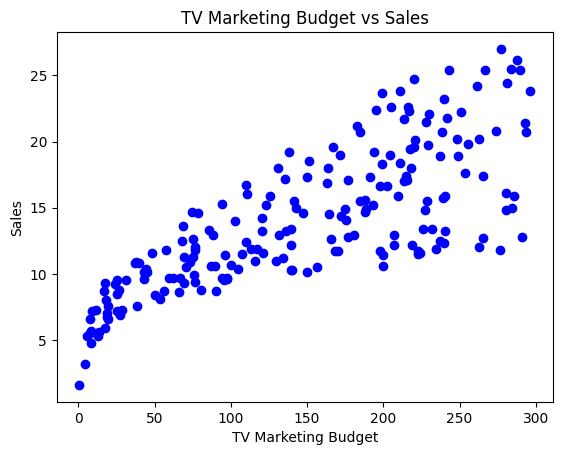

In [34]:
# 5. Visualize the relationship between TV marketing budget and Sales using scatterplot
plt.scatter(df['TV'], df['Sales'], color='blue')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('TV Marketing Budget vs Sales')
plt.show()

In [35]:
# 6. Prepare X (feature variable) and y (response variable)
X = df[['TV']]  # Feature variable
y = df['Sales']  # Target variable

In [38]:
# 7. Split Data into Training and Testing Sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(df.shape)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(200, 2)
(140, 1) (60, 1) (140,) (60,)


In [39]:
# 8. Print the shape of train data and test data
print("\nTraining Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)


Training Data Shape: (140, 1) (140,)
Testing Data Shape: (60, 1) (60,)


In [40]:
# 9. Perform Linear Regression (on train data) without using any library
X_train_np = np.c_[np.ones(X_train.shape[0]), X_train]  # Add intercept term
theta = np.linalg.inv(X_train_np.T @ X_train_np) @ X_train_np.T @ y_train  # Compute coefficients
print("\nCoefficients (Without Library):\nIntercept:", theta[0], "\nSlope:", theta[1])


Coefficients (Without Library):
Intercept: 7.239459830751137 
Slope: 0.046407802128152674


In [50]:
# 10. Create the model using the calculated coefficients and make predictions on test data
X_test_np = np.c_[np.ones(X_test.shape[0]), X_test]
y_pred_manual = X_test_np @ theta

print("\nModified Test Data (with Intercept Column):\n", X_test_np)
print("\nCalculated Coefficients (theta):\n", theta)
print("\nManual Predictions on Test Data:\n", y_pred_manual)


Modified Test Data (with Intercept Column):
 [[  1.  163.3]
 [  1.  195.4]
 [  1.  292.9]
 [  1.   11.7]
 [  1.  220.3]
 [  1.   75.1]
 [  1.  216.8]
 [  1.   50. ]
 [  1.  222.4]
 [  1.  175.1]
 [  1.   31.5]
 [  1.   56.2]
 [  1.  234.5]
 [  1.    5.4]
 [  1.  139.5]
 [  1.  170.2]
 [  1.    7.3]
 [  1.  197.6]
 [  1.   75.3]
 [  1.  237.4]
 [  1.  229.5]
 [  1.   67.8]
 [  1.   38. ]
 [  1.  250.9]
 [  1.   69. ]
 [  1.   53.5]
 [  1.  213.5]
 [  1.  139.3]
 [  1.   87.2]
 [  1.    8.4]
 [  1.  199.8]
 [  1.   69.2]
 [  1.  198.9]
 [  1.   16.9]
 [  1.  280.7]
 [  1.  238.2]
 [  1.   48.3]
 [  1.  273.7]
 [  1.  117.2]
 [  1.   27.5]
 [  1.  116. ]
 [  1.  177. ]
 [  1.   43.1]
 [  1.   62.3]
 [  1.  224. ]
 [  1.   38.2]
 [  1.   70.6]
 [  1.  147.3]
 [  1.  104.6]
 [  1.   76.3]
 [  1.   78.2]
 [  1.  168.4]
 [  1.    8.7]
 [  1.    7.8]
 [  1.   76.4]
 [  1.  129.4]
 [  1.   73.4]
 [  1.  289.7]
 [  1.   19.6]
 [  1.  197.6]]

Calculated Coefficients (theta):
 [7.23945983 0.0464

In [42]:
# 11. Perform Linear Regression using sklearn
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [43]:
# 12. Print the intercept and coefficients
print("\nIntercept (Sklearn):", model.intercept_)
print("Coefficient (Sklearn):", model.coef_[0])


Intercept (Sklearn): 7.239459830751138
Coefficient (Sklearn): 0.046407802128152764


In [51]:
# 13. Make predictions on the testing set - y_pred
y_pred = model.predict(X_test)
print("\nPredictions using Sklearn Model:\n", y_pred)


Predictions using Sklearn Model:
 [14.81785392 16.30754437 20.83230507  7.78243112 17.46309864 10.72468577
 17.30067133  9.55984994 17.56055502 15.36546598  8.7013056   9.84757831
 18.12208943  7.49006196 13.71334823 15.13806775  7.57823679 16.40964153
 10.73396733 18.25667206 17.89005042 10.38590882  9.00295631 18.88317738
 10.44159818  9.72227724 17.14752559 13.70406667 11.28622018  7.62928537
 16.5117387  10.45087974 16.46997167  8.02375169 20.26612989 18.2937983
  9.48095667 19.94127527 12.67845424  8.51567439 12.62276488 15.45364081
  9.2396361  10.1306659  17.63480751  9.01223787 10.51585066 14.07532908
 12.09371593 10.78037513 10.86854996 15.05453371  7.64320771  7.60144069
 10.78501591 13.24462943 10.64579251 20.68380011  8.14905275 16.40964153]


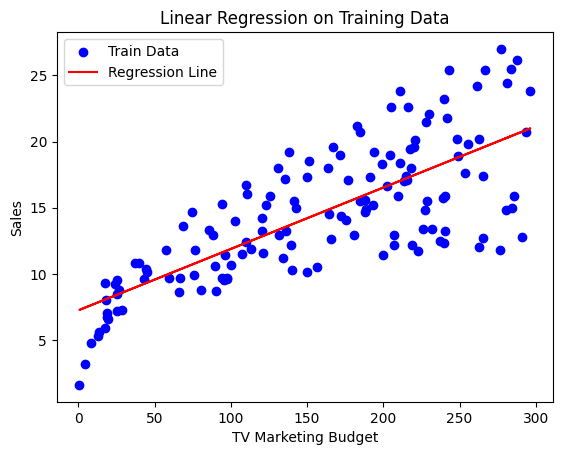

In [45]:
# 14. Plot train data and the model
plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_train, model.predict(X_train), color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression on Training Data')
plt.legend()
plt.show()

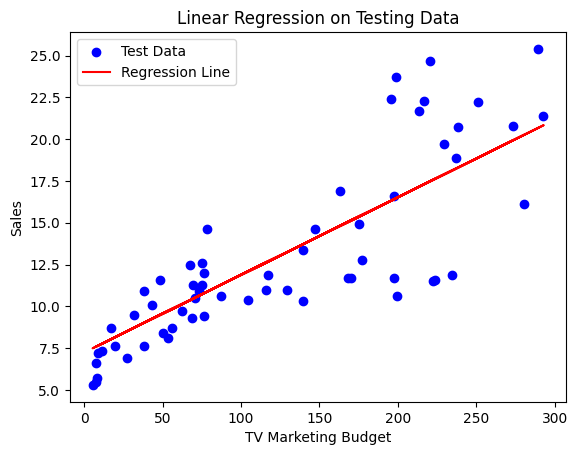

In [47]:
# 15. Plot test data and the model
plt.scatter(X_test, y_test, color='blue', label='Test Data')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('TV Marketing Budget')
plt.ylabel('Sales')
plt.title('Linear Regression on Testing Data')
plt.legend()
plt.show()

In [48]:
# 16. Print Mean Squared Error and R Squared Value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("\nMean Squared Error:", mse)
print("R Squared Value:", r2)


Mean Squared Error: 8.970991242413614
R Squared Value: 0.6714477229302764


In [49]:
# 17. Calculate and print R Squared and Adjusted R Squared values without using any library
n = len(y_test)  # Number of observations
p = 1  # Number of predictors
adjusted_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))
print("\nAdjusted R Squared (Manual Calculation):", adjusted_r2)


Adjusted R Squared (Manual Calculation): 0.6657830284980398
